In [1]:
# Setup logging
from timeseria import logger
logger.setup(level='INFO')

# Set default plot type as image
import os
os.environ["DEFAULT_PLOT_TYPE"] = "image"

⚠️ In this notebook, plots are configured to be rendered as images because otherwise they won't display correctly on GitHub or when the notebook is loaded (usually because not [trusted](https://stackoverflow.com/questions/44943646/jupyter-notebook-not-trusted)). To get interactive plots, remove the line above (or change it to "interactive") and re-run the notebook.

# Plotting

This notebook showcase various plots that can be made with [Timeseria](https://github.com/sarusso/Timeseria).

Let's start by loading a portion of a demo dataset:

In [2]:
from timeseria import TEST_DATASETS_PATH
from timeseria.datastructures import TimeSeries

timeseries = TimeSeries.from_csv(TEST_DATASETS_PATH + 'humitemp_long.csv')[0:5000]

### Simple plot

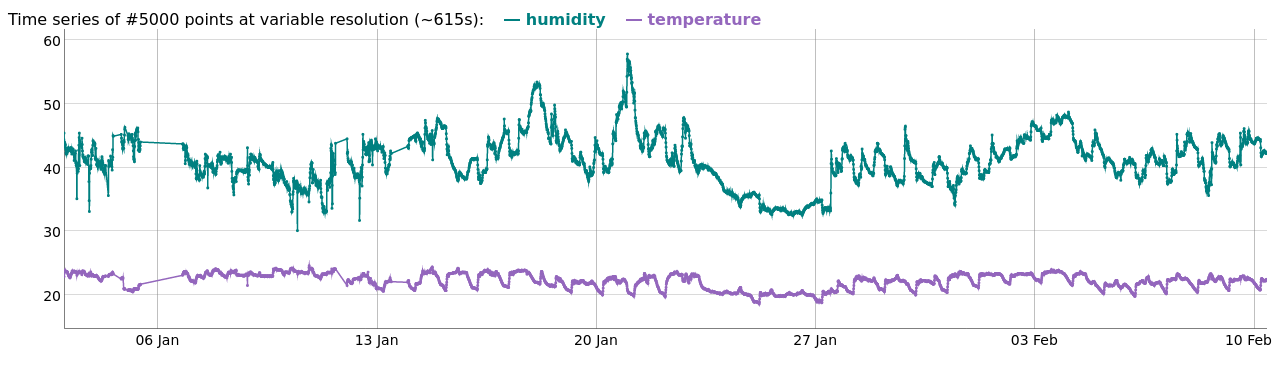

In [3]:
timeseries.plot()

### Plot with a title

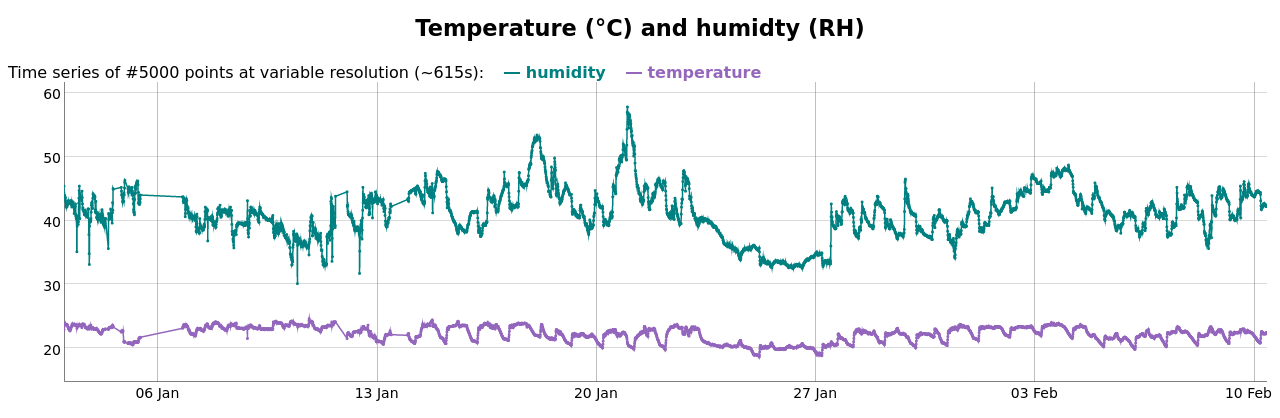

In [4]:
timeseries.plot(title = 'Temperature (°C) and humidty (RH)')

### Plot with an highlight

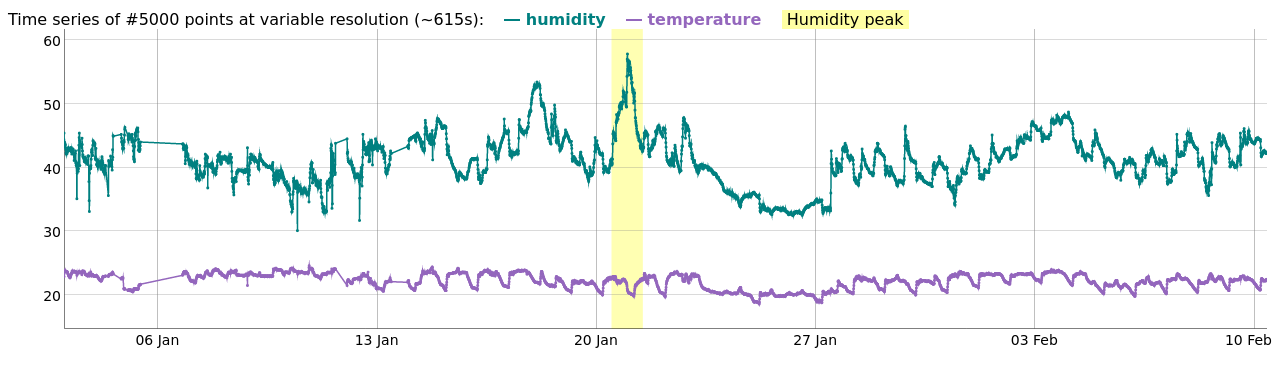

In [5]:
from propertime.utils import dt
timeseries.plot(mark=(dt(2019,1,20,12,0),dt(2019,1,21,12,0)), mark_title='Humidity peak')

### Plot only some labels

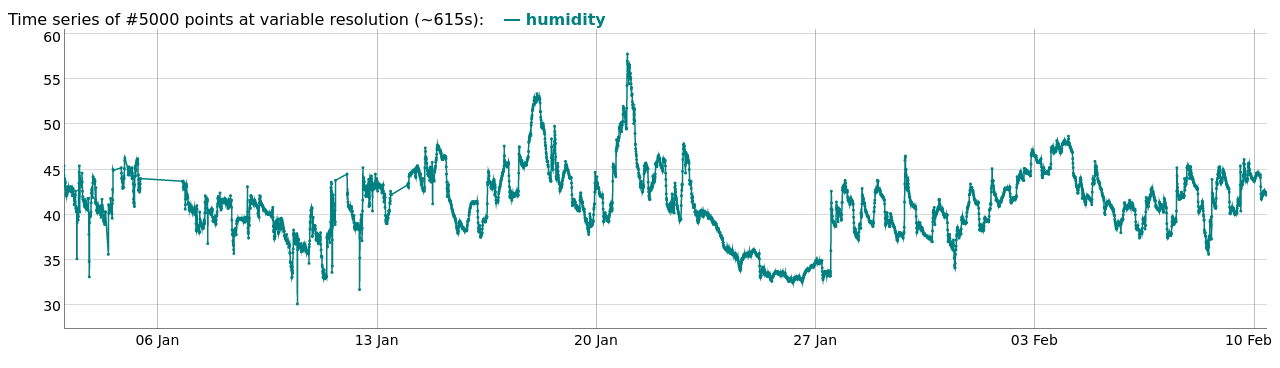

In [6]:
timeseries.plot(data_labels=['humidity'])

### Add custom data indexes

The data indexes in Timeseria are mainly used for showing data losses, reconstructed and forecasted data, and anomalies, but can be custom-defined as well and are rendered as an area chart underlying the time seris. They must be in the 0-1 range.

In [7]:
# Create a (made up) "humitemp_ratio" index
for datapoint in timeseries:
    datapoint.data_indexes['humitemp_ratio'] = 300/datapoint.data['humidity']/datapoint.data['temperature']

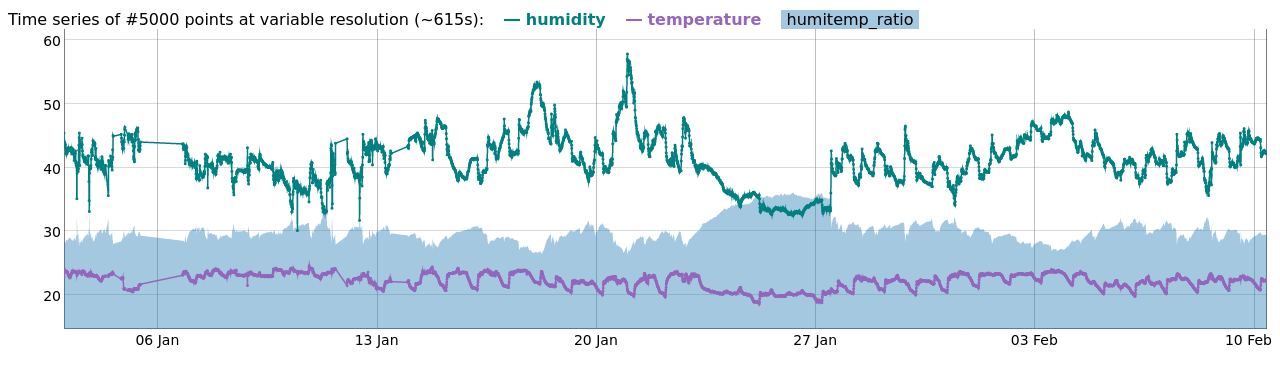

In [8]:
timeseries.plot()

### Plot only some data indexes

In [9]:
resampled_timeseries = timeseries.resample(600)

[INFO] timeseria.transformations: Using auto-detected sampling interval: 615.0s
[INFO] timeseria.transformations: Resampled 5000 DataTimePoints in 5530 DataTimePoints


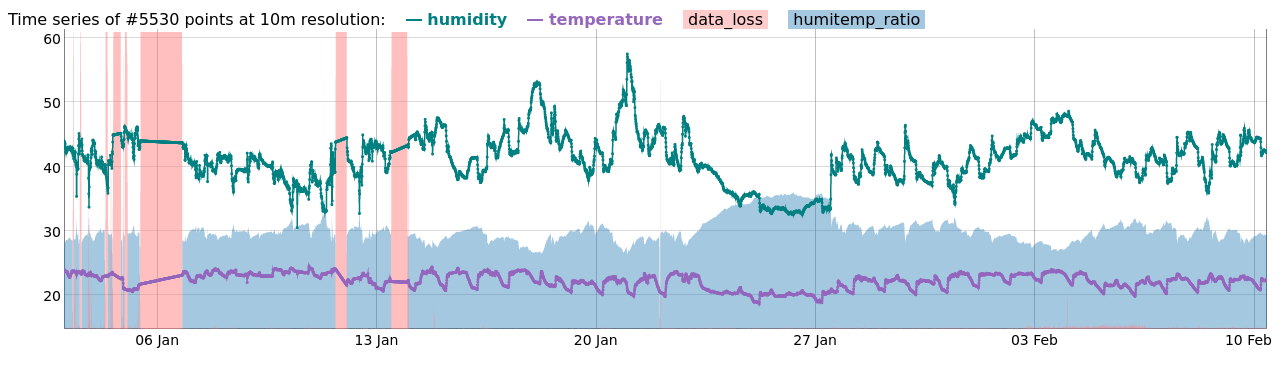

In [10]:
resampled_timeseries.plot()

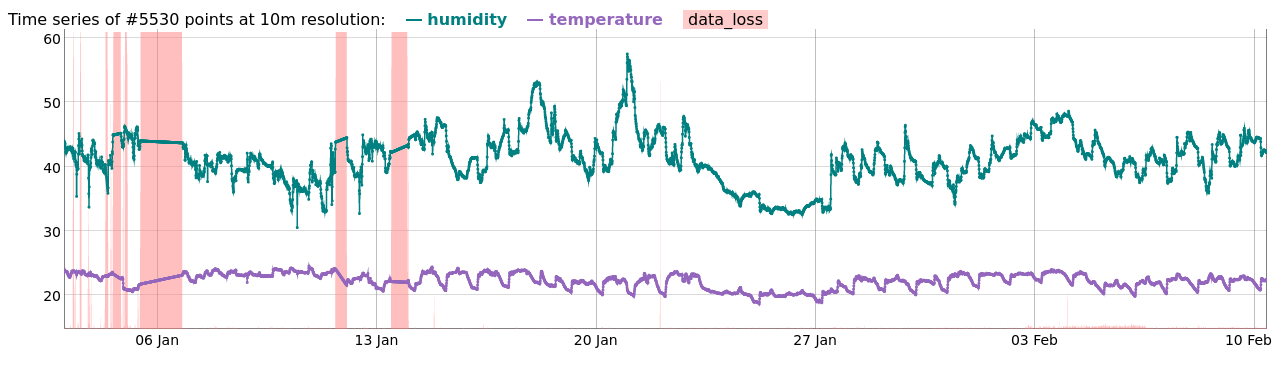

In [11]:
resampled_timeseries.plot(data_indexes=['data_loss'])

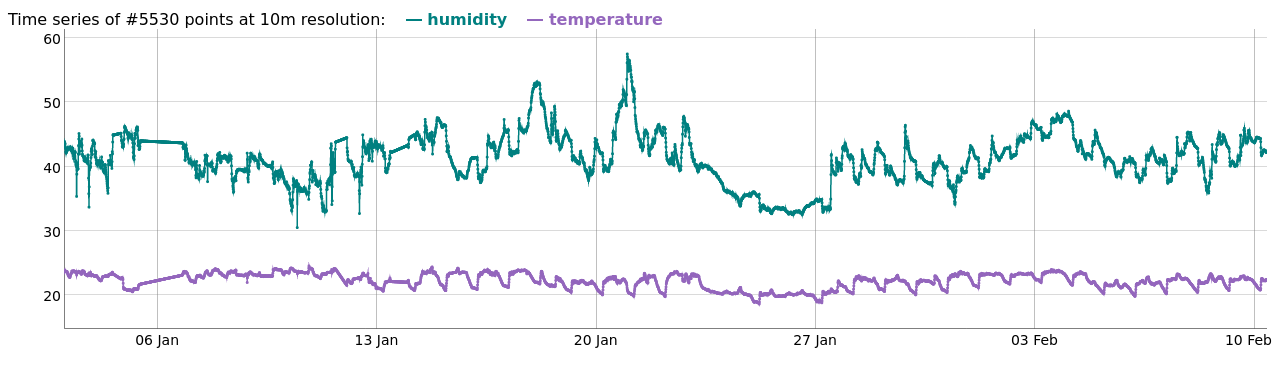

In [12]:
resampled_timeseries.plot(data_indexes=None)

### Handle plot-level aggregations

Plot-level aggregation for long (>1000 datapoints) series is enabled by default in order to speed up plotting. These are rendered using the average valuea and an underlying area chart containing the minumum and maximum values:

In [13]:
full_timeseries = TimeSeries.from_csv(TEST_DATASETS_PATH + 'humitemp_long.csv')

[INFO] timeseria.plots: Aggregating by "10" for improved plotting


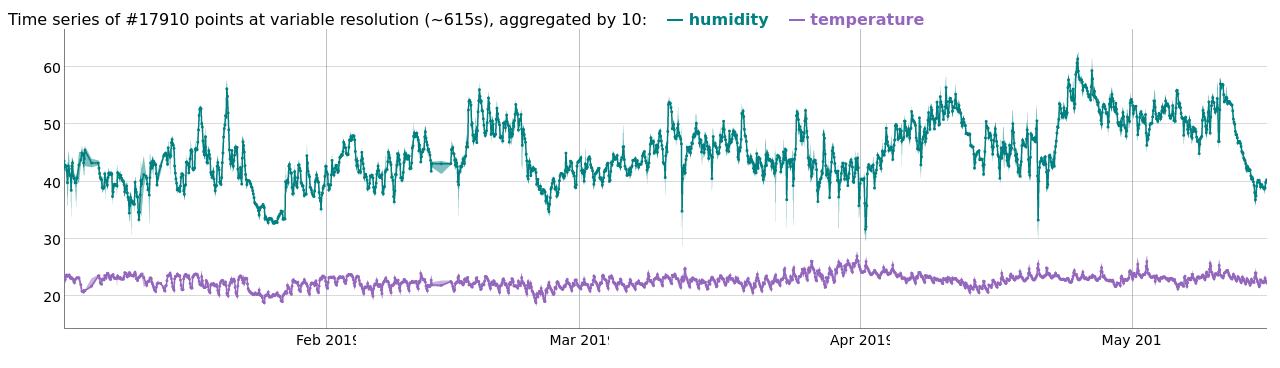

In [14]:
full_timeseries.plot()

Disable plot-level aggregation for long (>1000 datapoints) series. Warning, might crash your browser!

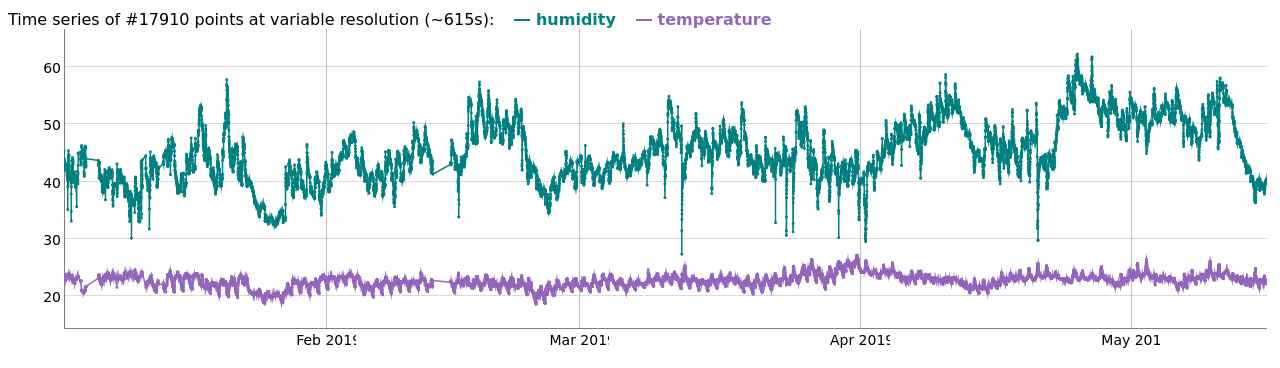

In [15]:
full_timeseries.plot(aggregate=False)

Plot-level aggregations can be enabled even manually should there be a need for this:

[INFO] timeseria.plots: Aggregating by "10" for improved plotting


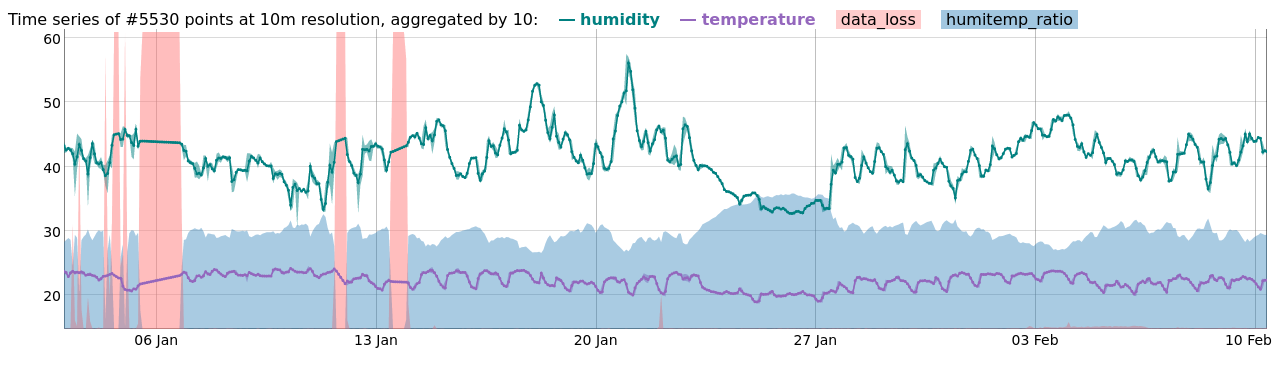

In [16]:
resampled_timeseries.plot(aggregate_by=10)

[INFO] timeseria.plots: Aggregating by "100" for improved plotting


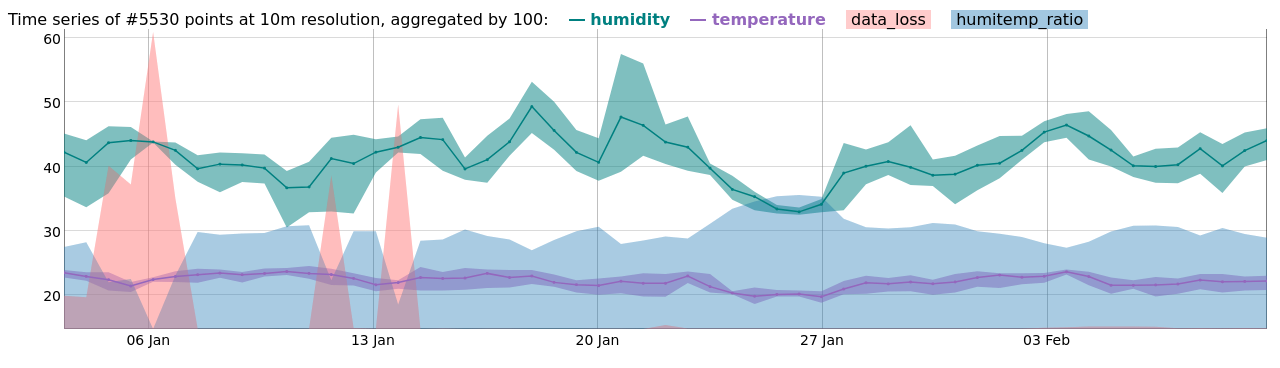

In [17]:
resampled_timeseries.plot(aggregate_by=100)

### Plot aggregated series

In [18]:
three_hourly_timeseries = resampled_timeseries.aggregate('3h')

[INFO] timeseria.transformations: Using auto-detected sampling interval: 600.0s
[INFO] timeseria.transformations: Aggregated 5530 points in 306 slots


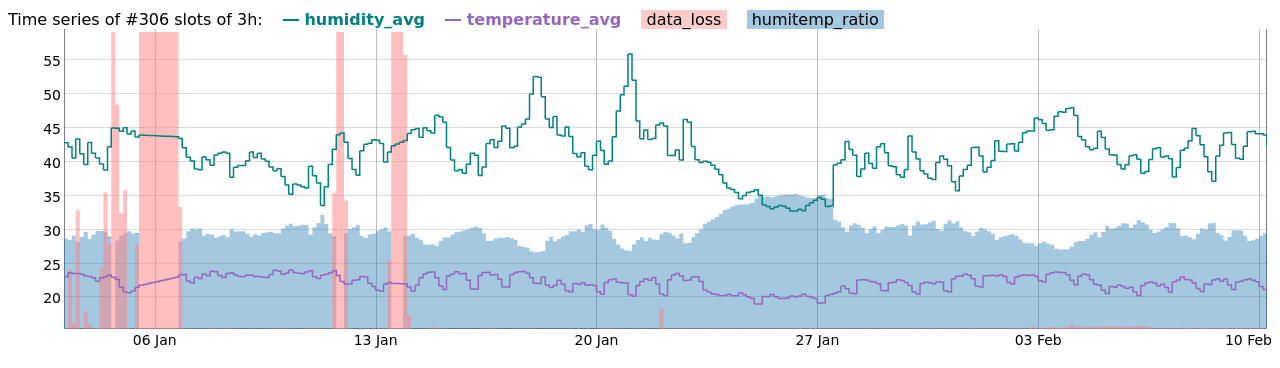

In [19]:
three_hourly_timeseries.plot()

[INFO] timeseria.plots: Aggregating by "8" for improved plotting


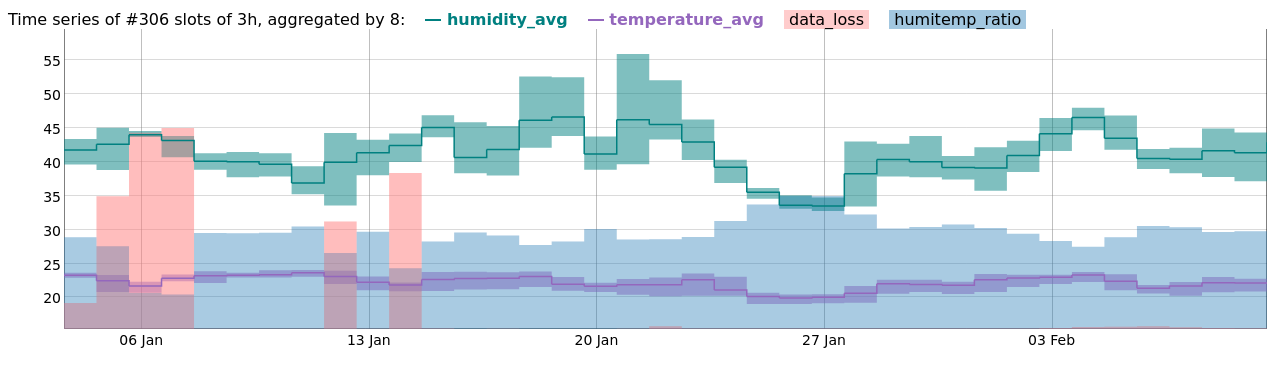

In [20]:
three_hourly_timeseries.plot(aggregate_by=8)

### Plot with full precision
Plot with (nearly) full precision, using 6 figures.

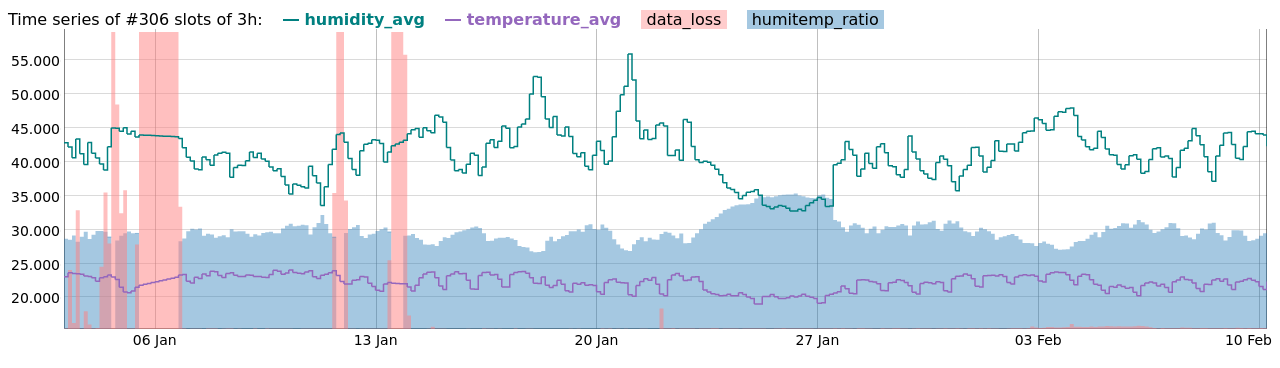

In [21]:
three_hourly_timeseries.plot(full_precision=True)